### Policy Gradient

In [4]:
import numpy as np
import gym
from dezero import Model
from dezero import optimizers
import dezero.functions as F
import dezero.layers as L

class Policy(Model):
    def __init__(self, action_size):
        super().__init__()
        self.l1 = L.Linear(128)
        self.l2 = L.Linear(action_size)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.softmax(self.l2(x))
        return  x

In [14]:
class Agent:
    def __init__(self):
        self.gamma = 0.98
        self.lr = 0.0002

        self.action_size = 2

        self.memory = []
        self.pi = Policy(self.action_size)
        self.optimizer = optimizers.Adam(self.lr)
        self.optimizer.setup(self.pi)

    def get_action(self, state):
        state = state[np.newaxis, :]  # 배치 처리용 축 추가
        probs = self.pi(state)        # 순전파 수행
        probs = probs[0]
        action = np.random.choice(len(probs), p=probs.data)  # 행동 선택
        return action, probs[action]  # 선택된 행동과 확률 반환


    def add(self, reward, prob):
        data = (reward, prob)
        self.memory.append(data)

    def update(self):
        self.pi.cleargrads()

        G, loss = 0, 0
        for reward, prob in reversed(self.memory):
            G = reward + self.gamma * G
        for reward, prob in reversed(self.memory):
            loss += -F.log(prob) * G

        loss.backward()
        self.optimizer.update()
        self.memory = []


Episode 0, Total Reward: 18.0
Episode 100, Total Reward: 20.0
Episode 200, Total Reward: 47.0
Episode 300, Total Reward: 11.0
Episode 400, Total Reward: 46.0
Episode 500, Total Reward: 36.0
Episode 600, Total Reward: 55.0
Episode 700, Total Reward: 57.0
Episode 800, Total Reward: 22.0
Episode 900, Total Reward: 81.0
Episode 1000, Total Reward: 25.0
Episode 1100, Total Reward: 77.0
Episode 1200, Total Reward: 60.0
Episode 1300, Total Reward: 108.0
Episode 1400, Total Reward: 64.0
Episode 1500, Total Reward: 64.0
Episode 1600, Total Reward: 80.0
Episode 1700, Total Reward: 95.0
Episode 1800, Total Reward: 42.0
Episode 1900, Total Reward: 125.0
Episode 2000, Total Reward: 104.0
Episode 2100, Total Reward: 158.0
Episode 2200, Total Reward: 108.0
Episode 2300, Total Reward: 86.0
Episode 2400, Total Reward: 117.0
Episode 2500, Total Reward: 200.0
Episode 2600, Total Reward: 61.0
Episode 2700, Total Reward: 87.0
Episode 2800, Total Reward: 200.0
Episode 2900, Total Reward: 101.0


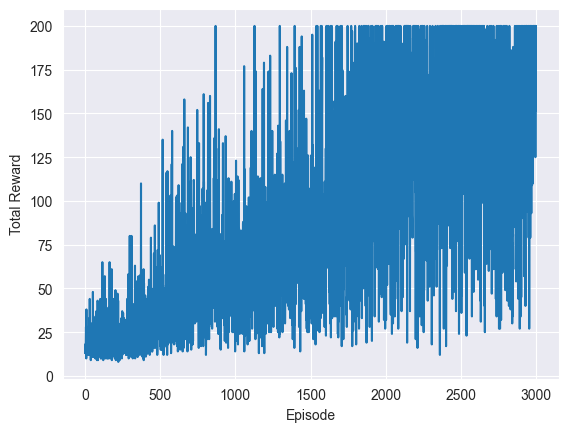

In [21]:
episodes = 3000

env = gym.make('CartPole-v0', render_mode="rgb_array")
agent = Agent()
reward_history = []

for episode in range(episodes):
    state = env.reset()[0]
    done = False
    total_reward = 0

    while not done:
        action, prob = agent.get_action(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated | truncated

        agent.add(reward, prob)
        state = next_state
        total_reward += reward

    agent.update()

    reward_history.append(total_reward)
    if episode % 100 == 0:
        print(f"Episode {episode}, Total Reward: {total_reward}")

from common.utils import plot_total_reward
plot_total_reward(reward_history)


In [22]:
env2 = gym.make('CartPole-v0', render_mode="human")

state = env2.reset()[0]
done = False
total_reward = 0

while not done:
    action, prob = agent.get_action(state)
    next_state, reward, terminated, truncated, info = env2.step(action)
    done = terminated | truncated
    state = next_state
    total_reward += reward
    env2.render()
print(f"Total Reward: {total_reward}")

Total Reward: 143.0


### Reinforce2.py 실습

In [6]:
import numpy as np
import gym
from dezero import Model
from dezero import optimizers
import dezero.functions as F
import dezero.layers as L

class Policy(Model):
    def __init__(self, action_size):
        super().__init__()
        self.l1 = L.Linear(128)
        self.l2 = L.Linear(action_size)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.softmax(self.l2(x))
        return  x

In [7]:
class Agent:
    def __init__(self):
        self.gamma = 0.98
        self.lr = 0.0002
        self.action_size = 2

        self.memory = []
        self.pi = Policy(self.action_size)
        self.optimizer = optimizers.Adam(self.lr)
        self.optimizer.setup(self.pi)

    def get_action(self, state):
        state = state[np.newaxis, :]  # 배치 처리용 축 추가
        probs = self.pi(state)        # 순전파 수행
        probs = probs[0]
        action = np.random.choice(len(probs), p=probs.data)  # 행동 선택
        return action, probs[action]  # 선택된 행동과 확률 반환


    def add(self, reward, prob):
        data = (reward, prob)
        self.memory.append(data)

    def update(self):
        self.pi.cleargrads()

        G, loss = 0, 0
        for reward, prob in reversed(self.memory):
            G = reward + self.gamma * G
            loss += -F.log(prob) * G

        loss.backward()
        self.optimizer.update()
        self.memory = []


/Users/chohi/project/ai/Reinforcement-Learning/PythonPrj/.venv/lib/python3.9/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


Episode 0, Total Reward: 35.0
Episode 100, Total Reward: 24.0
Episode 200, Total Reward: 11.0
Episode 300, Total Reward: 44.0
Episode 400, Total Reward: 90.0
Episode 500, Total Reward: 45.0
Episode 600, Total Reward: 67.0
Episode 700, Total Reward: 107.0
Episode 800, Total Reward: 200.0
Episode 900, Total Reward: 200.0
Episode 1000, Total Reward: 111.0
Episode 1100, Total Reward: 200.0
Episode 1200, Total Reward: 121.0
Episode 1300, Total Reward: 200.0
Episode 1400, Total Reward: 200.0
Episode 1500, Total Reward: 200.0
Episode 1600, Total Reward: 200.0
Episode 1700, Total Reward: 200.0
Episode 1800, Total Reward: 142.0
Episode 1900, Total Reward: 200.0
Episode 2000, Total Reward: 200.0
Episode 2100, Total Reward: 200.0
Episode 2200, Total Reward: 200.0
Episode 2300, Total Reward: 200.0
Episode 2400, Total Reward: 200.0
Episode 2500, Total Reward: 200.0
Episode 2600, Total Reward: 116.0
Episode 2700, Total Reward: 200.0
Episode 2800, Total Reward: 200.0
Episode 2900, Total Reward: 200.0

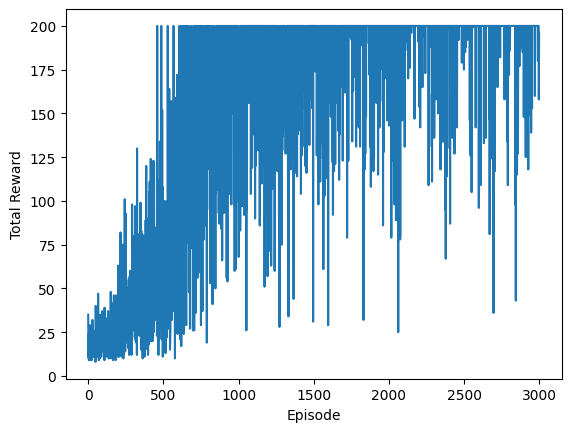

In [8]:
episodes = 3000

env = gym.make('CartPole-v0', render_mode="rgb_array")
agent = Agent()
reward_history = []

for episode in range(episodes):
    state = env.reset()[0]
    done = False
    total_reward = 0

    while not done:
        action, prob = agent.get_action(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated | truncated

        agent.add(reward, prob)
        state = next_state
        total_reward += reward

    agent.update()

    reward_history.append(total_reward)
    if episode % 100 == 0:
        print(f"Episode {episode}, Total Reward: {total_reward}")

from common.utils import plot_total_reward
plot_total_reward(reward_history)


In [9]:
env2 = gym.make('CartPole-v0', render_mode="human")

state = env2.reset()[0]
done = False
total_reward = 0

while not done:
    action, prob = agent.get_action(state)
    next_state, reward, terminated, truncated, info = env2.step(action)
    done = terminated | truncated
    agent.add(reward, prob)
    state = next_state
    total_reward += reward
    env2.render()
print(f"Total Reward: {total_reward}")

Total Reward: 200.0


### Actor_critic2.py 실습

In [44]:
import numpy as np
import gym
from dezero import Model
from dezero import optimizers
import dezero.functions as F
import dezero.layers as L


class PolicyNet(Model):  # 정책 신경망
    def __init__(self, action_size=2):
        super().__init__()
        self.l1 = L.Linear(128)
        self.l2 = L.Linear(action_size)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        x = F.softmax(x)  # 확률 출력
        return x


class ValueNet(Model):  # 가치 함수 신경망
    def __init__(self):
        super().__init__()
        self.l1 = L.Linear(128)
        self.l2 = L.Linear(1)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        return x


In [45]:
class Agent:
    def __init__(self):
        self.gamma = 0.98
        self.lr_pi = 0.0002
        self.lr_v = 0.0005
        self.action_size = 2

        self.pi = PolicyNet()
        self.v = ValueNet()
        self.optimizer_pi = optimizers.Adam(self.lr_pi).setup(self.pi)
        self.optimizer_v = optimizers.Adam(self.lr_v).setup(self.v)

    def get_action(self, state):
        state = state[np.newaxis, :]  # 배치 처리용 축 추가
        probs = self.pi(state)
        probs = probs[0]
        action = np.random.choice(len(probs), p=probs.data)
        return action, probs[action]  # 선택된 행동과 해당 행동의 확률 반환

    def update(self, state, action_prob, reward, next_state, done):
        # 배치 처리용 축 추가
        state = state[np.newaxis, :]
        next_state = next_state[np.newaxis, :]

        # 가치 함수(self.v)의 손실 계산
        target = reward + self.gamma * self.v(next_state) * (1 - done)  # TD 목표
        target.unchain()
        v = self.v(state)  # 현재 상태의 가치 함수
        loss_v = F.mean_squared_error(v, target)  # 두 값의 평균 제곱 오차

        # 정책(self.pi)의 손실 계산
        delta = target - v
        delta.unchain()
        loss_pi = -F.log(action_prob) * delta

        # 신경망 학습
        self.v.cleargrads()
        self.pi.cleargrads()
        loss_v.backward()
        loss_pi.backward()
        self.optimizer_v.update()
        self.optimizer_pi.update()

episode :0, total reward : 13.0
episode :100, total reward : 10.0
episode :200, total reward : 11.0
episode :300, total reward : 9.0
episode :400, total reward : 45.0
episode :500, total reward : 96.0
episode :600, total reward : 200.0
episode :700, total reward : 200.0
episode :800, total reward : 200.0
episode :900, total reward : 23.0
episode :1000, total reward : 200.0
episode :1100, total reward : 181.0
episode :1200, total reward : 200.0
episode :1300, total reward : 200.0
episode :1400, total reward : 200.0
episode :1500, total reward : 200.0
episode :1600, total reward : 200.0
episode :1700, total reward : 200.0
episode :1800, total reward : 200.0
episode :1900, total reward : 200.0
episode :2000, total reward : 200.0
episode :2100, total reward : 200.0
episode :2200, total reward : 10.0
episode :2300, total reward : 200.0
episode :2400, total reward : 200.0
episode :2500, total reward : 200.0
episode :2600, total reward : 157.0
episode :2700, total reward : 200.0
episode :2800

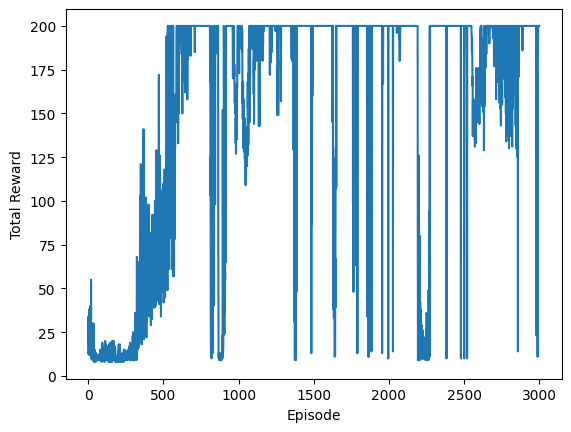

Total Reward: 200.0


In [46]:
episodes = 3000
env = gym.make('CartPole-v0', render_mode='rgb_array')
agent = Agent()
reward_history = []

for episode in range(episodes):
    state = env.reset()[0]
    done = False
    total_reward = 0

    while not done:
        action, prob = agent.get_action(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated | truncated

        agent.update(state, prob, reward, next_state, done)

        state = next_state
        total_reward += reward

    reward_history.append(total_reward)
    if episode % 100 == 0:
        print("episode :{}, total reward : {:.1f}".format(episode, total_reward))

from common.utils import plot_total_reward
plot_total_reward(reward_history)

env2 = gym.make('CartPole-v0', render_mode="human")

state = env2.reset()[0]
done = False
total_reward = 0

while not done:
    action, prob = agent.get_action(state)
    next_state, reward, terminated, truncated, info = env2.step(action)
    done = terminated | truncated

    agent.update(state, prob, reward, next_state, done)

    state = next_state
    total_reward += reward
    env2.render()

print(f"Total Reward: {total_reward}")